## Using a Dataset to Investigate the Relationship Between High Cholesterol Levels and Risk of Heart Disease

### Adam Trainer, Matthew Zizek, Phoebe Qiu, Rikki Ye

## Introduction
Prior research has shown that several risk factors increase the prevalence of heart attacks and heart diseases, including age and high cholesterol levels (above 200 mg/dL). 

Therefore, we will be using data from a valid data set to answer the following predictive question; “Can age and cholesterol levels be used to predict if an individual has a heart disease”. 

The UC Irvine (UCI) Machine Learning Repository contains the Cleveland heart disease dataset that will be used to answer our question. The dataset is used by machine learning researchers to analyze algorithms by answering a variety of predictive questions including predicting heart diseases for patients using many health risk predictors. 

## Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(repr)
library(RColorBrewer)
data <- read_csv("https://github.com/matthewzizek/dsci-100-project/raw/main/data/processed.cleveland.data")

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
cleveland <- data |>
  select(1, 5, 14) |>
  rename(age = 1, chol = 2, diag = 3)

cleveland

age,chol,diag
<dbl>,<dbl>,<dbl>
67,286,2
67,229,1
37,250,0
41,204,0
56,236,0
62,268,3
57,354,0
63,254,2
53,203,1


In [3]:
set.seed(1)

# Splitting the data frame into training and testing datasets
cleveland_split <- initial_split(cleveland, prop = 0.75, strata = diag)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)
head(cleveland_train)

cleveland2 <- cleveland_train

cleveland2$diag <- as.character(cleveland2$diag)


for(i in 1:nrow(cleveland2)){
    if(cleveland2[i, 3] != "0") {
        cleveland2[i, 3] <- "presence of disease" 
        } else {
        cleveland2[i, 3] <- "no disease"
    }
    }

cleveland2

age,chol,diag
<dbl>,<dbl>,<dbl>
37,250,0
56,236,0
44,263,0
54,239,0
64,211,0
58,283,0


age,chol,diag
<dbl>,<dbl>,<chr>
37,250,no disease
56,236,no disease
44,263,no disease
54,239,no disease
64,211,no disease
58,283,no disease
60,206,presence of disease
50,219,no disease
58,340,no disease


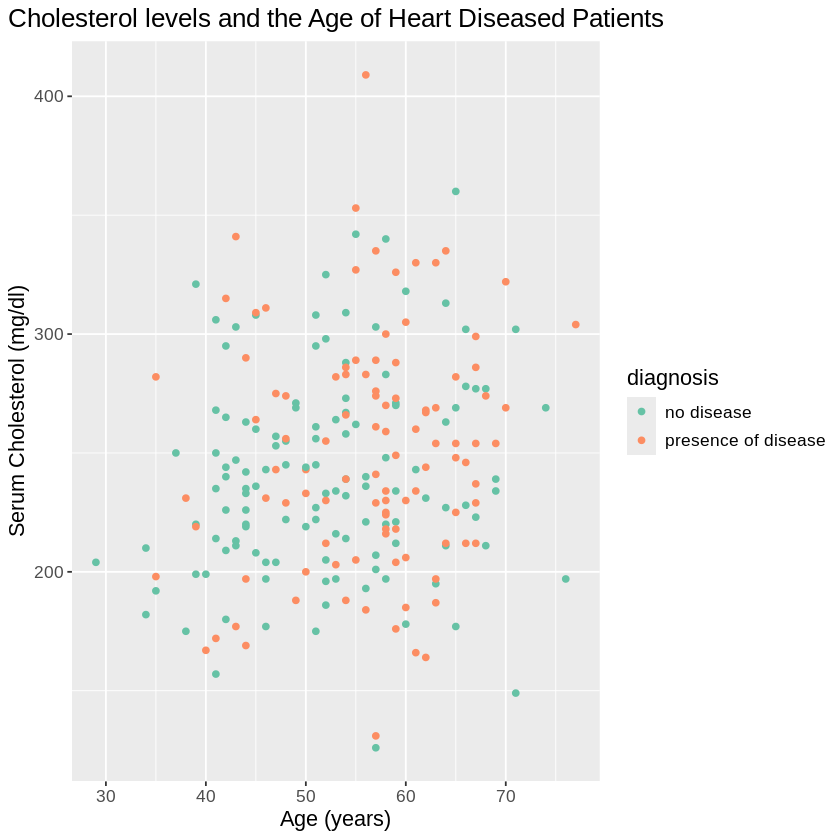

In [6]:
#Creating a scatter plot using training data
cleveland_plot <- cleveland2 |>
                    ggplot(aes(x = age, y = chol, color = as_factor(diag))) +
                    geom_point() +
                    labs(x = "Age (years)", y = "Serum Cholesterol (mg/dl)", 
                         title = "Cholesterol levels and the Age of Heart Diseased Patients",
                        color = "diagnosis") +
                    theme(text = element_text(size = 13)) +
                    theme(plot.title=element_text(hjust = 0.5)) +
                    scale_color_brewer(palette = "Set2")
cleveland_plot

## Methods

We applied initial_split() to split our data frame into 75% training data and 25% testing data. We only used the training data for analysis. To conduct our data analysis, we will plot the cholesterol levels against the age of the patients using a scatter plot, and then colour the data points based on the presence of cardiovascular disease in the patient. Using cholesterol as a predictor, we will then analyze the effect that cholesterol levels have on the development of cardiovascular disease. diag represents the diagnosis of heart disease consisting of values of 0 means < 50% diameter narrowing (absence of disease) and 1,2,3, and 4 means > 50% diameter narrowing (presence of disease). Cholesterol is in mg/dl and age in years.

## Expected Outcomes and Significance

We anticipate that as cholesterol levels rise, so does the likelihood of developing cardiovascular disease. This realization, particularly after presenting evidence highlighting the adverse effects of high cholesterol, could motivate individuals to adopt behaviours conducive to maintaining lower cholesterol levels in their daily lives.

## Future Questions
After discussing amongst ourselves we have deduced that some possible questions that this project would lead to include:

What could someone do/avoid to decrease cholesterol levels? 

What other factors may contribute to a higher risk of heart disease?

What other short and long-term physical effects can be associated with chleosterol? 



## Bibliography
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.